In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines

import initialise
import common

In [2]:
%matplotlib inline

In [3]:
TEXT_SIZE = 7
FONT_SIZE = 7
TITLE_SIZE = 8

In [4]:
tests = {
    'Nowcasting': (365, 1),
    '1-month': (394, 30),
    '2-months': (425, 61),
    '3-months': (455, 91),
    '4-months': (486, 122),
    '5-months': (516, 152),
    '6-months': (547, 183),
    '7-months': (577, 213),
    '8-months': (607, 243),
    '9-months': (638, 274),
    '10-months': (668, 304),
    '11-months': (699, 335),
    '12-months': (729, 365),
}

In [5]:
for x, (y, (z1, z2)) in enumerate(tests.items()):
    print(x, y, z1, z2)

0 Nowcasting 365 1
1 1-month 394 30
2 2-months 425 61
3 3-months 455 91
4 4-months 486 122
5 5-months 516 152
6 6-months 547 183
7 7-months 577 213
8 8-months 607 243
9 9-months 638 274
10 10-months 668 304
11 11-months 699 335
12 12-months 729 365


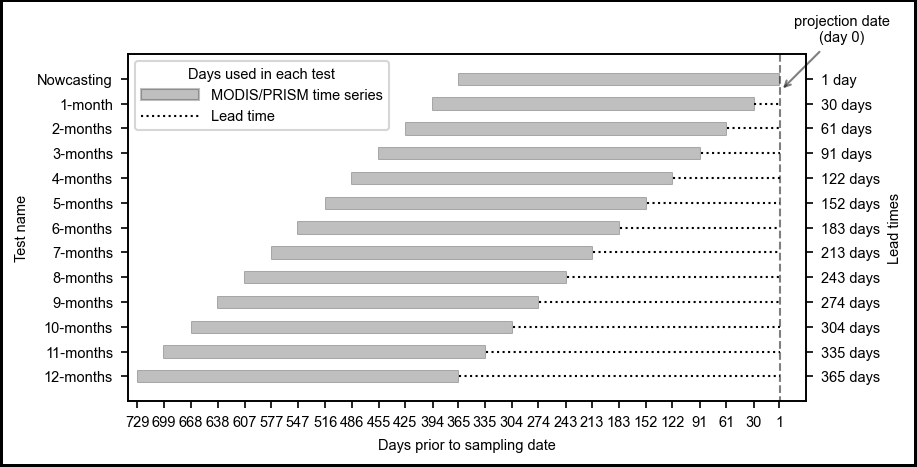

In [6]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = TEXT_SIZE

fig, ax = plt.subplots(1, 1, figsize=(6, 3), constrained_layout=True, dpi=150, linewidth=2, edgecolor="black")

ax.set_xlim(740, -30)
ax.set_xticks(sorted({v[0] for v in tests.values()} | {v[1] for v in tests.values()}, reverse=True))
ax.set_xlabel('Days prior to sampling date')

ax.set_ylim(13, -1)
ax.set_yticks(range(12, -1, -1))
ax.set_yticklabels(reversed(tests.keys()))
ax.set_ylabel('Test name')

ax1 = ax.twinx()
ax1.set_ylim(13, -1)
ax1.set_yticks(range(12, -1, -1))
ax1.set_yticklabels(reversed([f"{v[1]} {'day' if v[1] == 1 else 'days'}" for v in tests.values()]))
ax1.set_ylabel('Lead times')

ax.plot((0, 0), (-1, 13), '--', linewidth=1, color='k', alpha=0.5)
ax.annotate(f'projection date\n(day 0)', (0, 0.5), (-70, -1.5), horizontalalignment="center",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", alpha=0.5))

for test_num, (test_name, (start, stop)) in enumerate(tests.items()):
    rect = patches.Rectangle((start+0.5, test_num-0.25), stop-start-0.5, 0.5, linewidth=0.5,
                             edgecolor='k', facecolor='k', alpha=0.25)
    ax.add_patch(rect)
    ax.plot([stop-1, 0], [test_num, test_num], ':', color='k', linewidth=1)
    
patch1 = patches.Patch(color='k', alpha=0.25, label='MODIS/PRISM time series')
patch2 = lines.Line2D([0], [0], linestyle=':', linewidth=1, color='k', label='Lead time')

plt.legend(handles=[patch1, patch2], loc='upper left', handlelength=4, title='Days used in each test')

fig.savefig(os.path.join(common.FIGURES_DIR, 'Test lead times.jpeg'), format="jpeg", bbox_inches='tight', pad_inches=0.1, dpi=600)